# Latar Belakang
Demografi adalah elemen penting yang digunakan untuk memahami dan mengelompokkan konsumen. Analisis demografi dapat membantu perusahaan menciptakan strategi pemasaran yang lebih efektif dengan memahami kebutuhan, preferensi, dan kebiasaan belanja dari kelompok konsumen yang berbeda. Dengan melakukan analisis demografi, perusahaan dapat memahami kebutuhan khusus dari tiap kelompok demografis. hal ini memungkin kan perusahaan untuk melakukan optimasi pemasaran dan melakukan pengembangan produk yang relevan bagi konsumen tertentu.

# Pernyataan masalah
Supermarket ingin mengetahui preferensi belanja berdasarkan kelompok konsumen. Sehingga memungkinkan perusahaan untuk fokus pada segmen yang memiliki potensi terbesar.

Sebagai seorang data analyst, masalah tersebut akan di jawab dengan pertanyaan berikut:

1. __apakah demografi memiliki pengaruh dalam preferensi berbelanja?__
2. __bagaimana melakukan optimalisasi pemasaran dan melakukan pengembangan produk yang relevan bagi konsumen tertentu?__

# DATA

In [3324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3326]:
warnings.filterwarnings('ignore')

In [3328]:
pd.set_option("display.max_columns", None)

df = pd.read_csv('Supermarket Customers.csv')

In [3330]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3332]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


Deskripsi Kolom

People
- ID: Pengidentifikasi unik pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status perkawinan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah anak dalam rumah tangga pelanggan
- Teenhome: Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer: Tanggal pendaftaran pelanggan di perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak


Products
- MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

Promotion
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak

Place
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan


# DATA UNDERSTANDING & DATA CLEANSING

sebelum masuk ke data analysis, terlebih dahulu dilakukan Data Understanding dan Data Celansing. Data understanding perlu dilakukan untuk memahami lebih dalam tentang data yang ada di dalam dataset sehingga kita bisa mengetahui anomali-anomali yang terdapat dalam dataset tersebut. kemudian anomali tersebut akan ditangani dalam tahapan Data Cleansing

In [3336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Missing Value

In [3339]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        # df[i].dtypes, # --> tipe data
        df[i].isna().sum(), #--> jumlah missing value
        round((df[i].isna().sum() / len(df)) * 100, 2)]) #--> persentase missing value
        # df[i].nunique(), # --> jumlah data unik
        # df[i].unique() #--> Data unik 

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    # "Data Types",
    "Null Val",
    "Null Percentage"])
    # "Number of Unique",
    # "Unique"

,Data Features,Null Val,Null Percentage
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,24,1.07
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntWines,0,0.00


- berdasarkan info pada data tersebut, missing value hanya terdapat pada kolom Income sebanyak 24 atau sekitar 1.07% dari total data kolom tersebut. maka dari itu missing value tersebut akan di hapus
- terdapat kolom yang formatnya tidak sesuai dengan isinya yaitu Dt_Customer. kolom tersebut berisikan tanggal pendaftaran pelanggan di perusahaan tetapi tipe datanya object. maka dari itu kita akan menggantinya dengan tipe data datetime[ns]

## Hapus Missing Value

In [3343]:
df = df.dropna()

In [3345]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Konversi tipe data object ke datetime

In [3348]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', dayfirst=True)
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


# Data duplikat

In [3351]:
df.duplicated().sum()

0

- berdasarkan hasil diatas. diperoleh bahwa data duplikat berjumlah 0. semua baris memiliki data yang berbeda minimal pada 1 kolom yang ada di dataframe.
- tetapi akan dilakukan pengecekan apakah dengan id yang berbeda terdapat data yang sama pada kolom demografi (Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer).

In [3354]:
demo_duplicates = df.groupby(['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer']).agg({'ID': pd.Series.nunique}).reset_index()
demo_duplicates

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,ID
0,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,1
1,1899,PhD,Together,83532.0,0,0,2013-09-26,1
2,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,1
3,1940,PhD,Single,51141.0,0,0,2013-07-08,1
4,1941,PhD,Married,93027.0,0,0,2013-04-13,1
...,...,...,...,...,...,...,...,...
2010,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,1
2011,1995,Graduation,Single,34824.0,0,0,2014-03-26,2
2012,1995,Graduation,Single,71163.0,0,0,2014-03-09,1
2013,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,1


In [3356]:
demo_duplicates[demo_duplicates['ID'] > 1]#.value_counts('ID')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,ID
7,1943,PhD,Divorced,48948.0,0,0,2013-02-01,2
27,1946,Graduation,Together,37760.0,0,0,2012-08-31,2
29,1946,Master,Married,66835.0,0,0,2013-09-28,2
31,1946,PhD,Married,51012.0,0,0,2013-04-18,2
33,1946,PhD,Single,82800.0,0,0,2012-11-24,2
...,...,...,...,...,...,...,...,...
1987,1991,Master,Single,90638.0,0,0,2014-02-13,2
1989,1991,PhD,Together,68682.0,0,0,2013-10-06,2
1995,1992,Graduation,Married,34935.0,0,0,2013-06-21,2
2005,1993,Graduation,Single,74293.0,0,0,2014-05-04,2


In [3360]:
demo_duplicates[demo_duplicates['ID'] > 1].value_counts('ID')

ID
2    185
3      8
Name: count, dtype: int64

terdapat 193 baris yang memiliki data demografi yang duplikat tetapi memiliki ID yang berbeda.

Berikut contoh data demografi duplikat tetapi memiliki id berbeda

In [3363]:
df[(df['Year_Birth'] == 1943) & (df['Education'] == 'PhD') & (df['Marital_Status'] == 'Divorced') & (df['Income'] == 48948.0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1
894,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1


In [3365]:
# Fungsi untuk memilih data duplikat dengan ID dan recency yang paling kecil
def Drop_duplicates(data):
    # Sort by Recency, lalu Customer_ID, and ambil yang pertama
    return data.sort_values(by=['Recency', 'ID'], ascending=[True, True]).iloc[0]

In [3367]:
# Mendefinisikan kembali data yang dipilih. Data dibersihkan dari customer yang terduplikat dan memiliki ID berbeda

df = df.groupby(['Year_Birth', 'Education', 'Marital_Status', 'Income', 
                         'Kidhome', 'Teenhome', 'Dt_Customer']).apply(Drop_duplicates).reset_index(drop=True)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
1,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0
2,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
3,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0
4,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,3,11,1
2011,5184,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,3,11,0
2012,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,3,11,0
2013,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1


## statistika deskriptif

In [3371]:
display(df.describe(),df.describe(include='O'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.00000,2015,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.0,2015.0,2015.000000
mean,5409.494789,1968.783623,52362.016377,0.442184,0.50670,2013-07-12 05:44:27.394541056,48.990074,304.596030,26.410918,167.815385,37.579156,27.180149,43.694789,2.327543,4.099256,2.668486,5.784119,5.313151,0.073449,0.075434,0.072457,0.065509,0.012903,0.009926,3.0,11.0,0.149876
min,0.000000,1893.000000,1730.000000,0.000000,0.00000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2622.500000,1959.000000,35533.500000,0.000000,0.00000,2013-01-17 00:00:00,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5252.000000,1970.000000,51537.000000,0.000000,0.00000,2013-07-13 00:00:00,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8146.500000,1977.000000,68641.000000,1.000000,1.00000,2014-01-02 12:00:00,74.000000,505.000000,33.000000,230.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.00000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3241.808800,11.984757,25580.674925,0.536185,0.54657,NaN,28.959083,336.621329,39.847050,226.396568,54.841113,41.479848,51.634281,1.924831,2.758948,2.940535,3.236544,2.437236,0.260937,0.264156,0.259307,0.247483,0.112885,0.099156,0.0,0.0,0.357038


,Education,Marital_Status
count,2015,2015
unique,5,8
top,Graduation,Married
freq,1014,781


In [3380]:

pd.set_option('display.max_colwidth', None)
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        # df[i].dtypes, # --> tipe data
        # df[i].isna().sum(), #--> jumlah missing value
        # round((df[i].isna().sum() / len(df)) * 100, 2)]) #--> persentase missing value
        df[i].nunique(), # --> jumlah data unik
        df[i].unique()]) #--> Data unik 

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    # "Data Types",
    # "Null Val",
    # "Null Percentage"])
    "Number of Unique",
    "Unique"])

,Data Features,Number of Unique,Unique
0,ID,2015,"[11004, 1150, 7829, 6663, 6932, 6142, 4994, 2968, 7106, 1453, 1740, 466, 4310, 3711, 4587, 6605, 9930, 10711, 819, 6543, 9370, 9260, 263, 4619, 158, 5029, 1577, 4939, 1553, 7881, 8755, 455, 7712, 2114, 182, 4001, 2079, 10250, 7990, 6963, 10814, 6203, 6248, 7718, 1173, 9952, 2878, 3859, 9298, 13, 3945, 6103, 10486, 10909, 5147, 10341, 4137, 6274, 4530, 5956, 4988, 5429, 7495, 895, 10314, 6715, 4107, 3336, 4149, 202, 7313, 3578, 7875, 2066, 2406, 10240, 7851, 10972, 8537, 4697, 1183, 5991, 873, 6565, 9504, 1146, 6379, 10664, 5329, 1993, 4475, 737, 11181, 2868, 716, 5092, 6250, 6181, 3503, 8783, ...]"
1,Year_Birth,59,"[1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996]"
2,Education,5,"[2n Cycle, PhD, Master, Graduation, Basic]"
3,Marital_Status,8,"[Single, Together, Divorced, Married, Widow, Absurd, Alone, YOLO]"
4,Income,1974,"[60182.0, 83532.0, 36640.0, 51141.0, 93027.0, 65073.0, 77598.0, 48948.0, 75865.0, 57513.0, 55956.0, 65275.0, 80589.0, 80184.0, 45006.0, 55614.0, 82716.0, 69755.0, 63285.0, 62847.0, 65846.0, 70356.0, 45576.0, 113734.0, 71604.0, 18100.0, 78569.0, 37760.0, 82657.0, 66835.0, 68657.0, 51012.0, 62159.0, 82800.0, 44124.0, 64014.0, 81044.0, 28389.0, 27469.0, 77457.0, 70321.0, 74485.0, 91712.0, 66000.0, 77632.0, 78093.0, 67472.0, 73059.0, 81574.0, 25358.0, 68117.0, 42192.0, 77142.0, 92344.0, 90842.0, 51315.0, 70666.0, 83790.0, 78427.0, 45072.0, 34469.0, 45579.0, 56223.0, 61467.0, 83837.0, 60200.0, 46681.0, 66375.0, 76140.0, 82032.0, 74859.0, 49160.0, 72025.0, 38823.0, 54591.0, 69372.0, 70165.0, 72298.0, 72643.0, 35416.0, 36408.0, 48150.0, 62845.0, 76995.0, 81698.0, 49912.0, 47570.0, 51529.0, 35946.0, 58607.0, 69098.0, 80360.0, 156924.0, 26518.0, 67911.0, 51569.0, 54356.0, 52203.0, 82460.0, 57045.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[1, 0, 2]"
7,Dt_Customer,662,"[2014-05-17 00:00:00, 2013-09-26 00:00:00, 2013-07-08 00:00:00, 2013-04-13 00:00:00, 2013-08-20 00:00:00, 2013-10-01 00:00:00, 2013-02-01 00:00:00, 2014-03-31 00:00:00, 2013-07-06 00:00:00, 2014-04-07 00:00:00, 2013-04-03 00:00:00, 2014-01-22 00:00:00, 2014-03-01 00:00:00, 2013-07-18 00:00:00, 2013-11-27 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2013-01-15 00:00:00, 2013-05-17 00:00:00, 2012-11-05 00:00:00, 2014-05-28 00:00:00, 2013-11-17 00:00:00, 2013-08-06 00:00:00, 2014-02-19 00:00:00, 2012-08-31 00:00:00, 2013-09-27 00:00:00, 2013-09-28 00:00:00, 2013-02-20 00:00:00, 2013-04-18 00:00:00, 2014-04-28 00:00:00, 2012-11-24 00:00:00, 2013-05-11 00:00:00, 2014-06-10 00:00:00, 2013-12-27 00:00:00, 2012-11-20 00:00:00, 2012-08-02 00:00:00, 2014-03-05 00:00:00, 2013-01-16 00:00:00, 2013-08-24 00:00:00, 2013-10-17 00:00:00, 2014-04-20 00:00:00, 2013-03-10 00:00:00, 2013-12-11 00:00:00, 2013-08-31 00:00:00, 2013-07-22 00:00:00, 2013-09-06 00:00:00, 2013-05-29 00:00:00, 2014-01-15 00:00:00, 2013-07-29 00:00:00, 2014-02-23 00:00:00, 2013-12-06 00:00:00, 2013-11-15 00:00:00, 2012-10-24 00:00:00, 2013-10-16 00:00:00, 2014-05-04 00:00:00, 2013-12-20 00:00:00, 2012-12-09 00:00:00, 2012-12-16 00:00:00, 2013-01-02 00:00:00, 2013-10-08 00:00:00, 2013-11-21 00:00:00, 2014-05-13 00:00:00, 2014-04-05 00:00:00, 2013-06-03 00:00:00, 2013-10-20 00:00:00, 2014-04-29 00:00:00, 2012-08-30 00:00:00, 2013-08-05 00:00:00, 2013-02-19 00:00:00, 2013-09-22 00:00:00, 2014-03-10 00:00:00, 2013-02-27 00:00:00, 2013-06-13 00:00:00, 2013-09-21 00:00:00, 2013-06-08 00:00:00, 2012-10-01 00:00:00, 2013-03-28 00:00:00, 2013-11-06 00:00:00, 2012-09-07 00:00:00, 2013-09-07 00:00:00, 2012-12-23 00:00:00, 2013-02-16 00:00:00, 2013-03-03 00:00:00, 2013-08-29 00:00:00, 2013-04-08 00:00:00, 2014-05-22 00:00:00, 2013-02-12 00:00:00, 2012-

- Kolom Education memiliki 5 data unik yaitu *Graduation, PhD, Master, Basic, 2n Cycle*. tetapi ada 3 value yang tidak menggunakan istilah umum sehingga pada sebagian orang akan sulit untuk mengerti. sehingga value tersebut akan diganti dengan istilah yang lebih umum
    - *Basic ==> High School*
    - *2n Cycle ==> Master*
    - *Graduation ==> Bachelor*
- kolom Martial_status memiliki 8 data unik yaitu *Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO*. pada umumnya martial status yang umum digunakan ada 4 yaitu *Single, Married, Widow, Divorce*. maka dari itu :
    - untuk *Single, Alone, Absurd,Yolo* karena memiliki arti yang sama, akan diseragamkan menjadi *single*
    - untuk *Together* akan diubah menjadi *Married*. arti *Together* dalam konteks pernikahan adalah pasangan yang memiliki suatu hubungan serius dan memiliki komitmen. bisa jadi juga mereka sudah tinggal bersama tetapi tanpa adanya ikatan hukum pernikahan.

## Mengganti Nama Value

In [3384]:
df['Education'] = df['Education'].replace({'Graduation' : 'Bachelor', '2n Cycle' : 'Master', 'Basic':'High School'})

In [3386]:
df['Education'].unique()

array(['Master', 'PhD', 'Bachelor', 'High School'], dtype=object)

In [3388]:
df['Marital_Status'] = df['Marital_Status'].replace({'Alone' : 'Single', 'Absurd' : 'Single','YOLO' : 'Single','Together' : 'Married'})

In [3390]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

## Menambah kolom baru yang akan digunakan

Usia customer di asumsikan per tahun 2024, karena tidak ada data didalam dataset yang menjelaskan tentang usia customer.

In [3395]:
# membuat kolom usia customer
df['Age'] = 2024 - df['Year_Birth']

In [3397]:
# membuat kolom total anak yang dimiliki customer
df['Total_Children'] = df['Kidhome'] + df['Teenhome'] 

In [3399]:
# melakukan pengelompokkan usia pada customer 
bins = [25,46,64,150]
labels = ['Adult','Middle Age','Older Adult']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [3401]:
bins = [0,63000,183000]
labels = ['Low Income','Middle Income']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels)

## Merapikan Urutan Kolom 

In [3405]:
df = df[['ID','Year_Birth','Age','Age_Group','Education','Marital_Status','Income','Income_Group','Kidhome','Teenhome','Total_Children','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue','Complain','Response']]

In [3407]:
df.head(1)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Kidhome,Teenhome,Total_Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Z_CostContact,Z_Revenue,Complain,Response
0,11004,1893,131,Older Adult,Master,Single,60182.0,Low Income,0,1,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,3,11,0,0


## Drop kolom yang tidak digunakan

In [3412]:
df.drop(columns=['ID','Year_Birth','Kidhome','Teenhome','Z_CostContact','Z_Revenue'],inplace=True)

In [3414]:
df

,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Total_Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,131,Older Adult,Master,Single,60182.0,Low Income,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
1,125,Older Adult,PhD,Married,83532.0,Middle Income,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,0,0
2,124,Older Adult,Master,Divorced,36640.0,Low Income,1,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
3,84,Older Adult,PhD,Single,51141.0,Low Income,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0
4,83,Older Adult,PhD,Married,93027.0,Middle Income,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,29,Adult,Master,Single,83257.0,Middle Income,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,0,0,1,0,1,1,1
2011,29,Adult,Bachelor,Single,34824.0,Low Income,0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,0
2012,29,Adult,Bachelor,Single,71163.0,Middle Income,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,0
2013,28,Adult,Master,Married,7500.0,Low Income,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,1


Setelah dilakukan drop kolom tersisa 26 kolom yang akan dipakai untuk analys data
- kolom *ID,Z_CostContact,Z_Revenue* dihapus karena tidak akan digunakan
- kolom *Year_Birth* dihapus karena sudah ada kolom pengganti yaitu kolom *Age* yang lebih mudah untuk digunakan
- kolom *Kidhome* dan *Teenhome* dihapus karena sudah ada kolom pengganti yaitu kolom *Total_Children* yang lebih mudah untuk digunakan

## Penanganan Outliers

In [3419]:
def cek_outliers(df,kolom):  
    Q1 = df[kolom].describe()['25%']
    Q3 = df[kolom].describe()['75%']
    IQR = Q3-Q1 
    upper_fance = Q3 + (1.5 * IQR)
    lower_fance = Q1 - (1.5 * IQR)
    df_outliers = df[(df[kolom] < lower_fance) | (df[kolom] > upper_fance)]
    if len(df_outliers) == 0:
        return 'no outliers'
    else:
        return df_outliers

<function matplotlib.pyplot.show(close=None, block=None)>

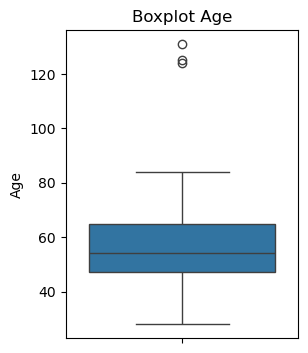

In [3421]:
plt.figure(figsize=(3,4))
sns.boxplot(df['Age'])
plt.title('Boxplot Age')

plt.show

In [3422]:
# Cek outliers pada kolom Age
cek_outliers(df,'Age')

,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Total_Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,131,Older Adult,Master,Single,60182.0,Low Income,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
1,125,Older Adult,PhD,Married,83532.0,Middle Income,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,0,0
2,124,Older Adult,Master,Divorced,36640.0,Low Income,1,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0


In [3425]:
# hapus Outliers pada kolom Age
df = df.drop(df[df['Age'] > 92].index)

<function matplotlib.pyplot.show(close=None, block=None)>

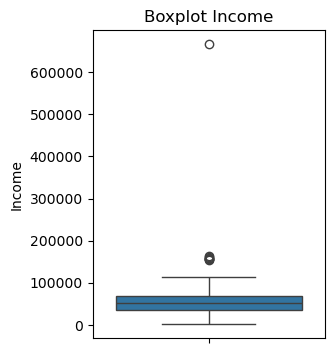

In [3427]:
plt.figure(figsize=(3,4))
sns.boxplot(df['Income'])
plt.title('Boxplot Income')

plt.show

In [3429]:
# Cek outliers pada kolom income
cek_outliers(df,'Income')

,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Total_Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
92,75,Older Adult,PhD,Married,156924.0,Middle Income,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1098,53,Middle Age,Master,Married,157733.0,Middle Income,1,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0
1241,51,Middle Age,PhD,Married,157243.0,Middle Income,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0
1328,49,Middle Age,Bachelor,Divorced,153924.0,Middle Income,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1467,48,Middle Age,PhD,Married,162397.0,Middle Income,2,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0
1501,47,Middle Age,Bachelor,Married,157146.0,Middle Income,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0
1502,47,Middle Age,Bachelor,Married,666666.0,NaN,1,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0
1744,42,Adult,PhD,Married,160803.0,Middle Income,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0


In [3431]:
# Cek jumlah outliers pada kolom income
cek_outliers(df,'Income').value_counts().sum()

7

In [3433]:
Q1 = df['Income'].describe()['25%']
Q3 = df['Income'].describe()['75%']
IQR = Q3-Q1 
upper_fance = Q3 + (1.5 * IQR)
lower_fance = Q1 - (1.5 * IQR)

In [3435]:
df = df.drop(df[df['Income'] > upper_fance].index)

- Terdapat 3 outliers pada kolom *Age*. dapat dilihat bahwa umur tersebut memang tidak masuk akal. bisa jadi disebakan oleh kesalahan inputan dari user. maka dari itu data outliers tersebut dihapus.
- pada kolom income, terdapat 8 outliers. penanganan dilakukan dengan cara di hapus karena jumlah data yang sedikit

In [3440]:
## data summary 

In [3442]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes, # --> tipe data
        df[i].isna().sum(), #--> jumlah missing value
        round((df[i].isna().sum() / len(df)) * 100, 2), #--> persentase missing value
        df[i].nunique(), # --> jumlah data unik
        df[i].drop_duplicates().sample(2).values]) #--> Data unik 

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage",
    "Number of Unique",
    "Unique Data Sample"])

,Data Features,Data Types,Null Val,Null Percentage,Number of Unique,Unique Data Sample
0,Age,int64,0,0.0,56,"[74, 80]"
1,Age_Group,category,0,0.0,3,"['Older Adult', 'Adult'] Categories (3, object): ['Adult' < 'Middle Age' < 'Older Adult']"
2,Education,object,0,0.0,4,"[Master, PhD]"
3,Marital_Status,object,0,0.0,4,"[Divorced, Married]"
4,Income,float64,0,0.0,1963,"[48752.0, 72258.0]"
5,Income_Group,category,0,0.0,2,"['Low Income', 'Middle Income'] Categories (2, object): ['Low Income' < 'Middle Income']"
6,Total_Children,int64,0,0.0,4,"[2, 1]"
7,Dt_Customer,datetime64[ns],0,0.0,662,"[2013-03-05T00:00:00.000000000, 2013-05-30T00:00:00.000000000]"
8,Recency,int64,0,0.0,100,"[46, 73]"
9,MntWines,int64,0,0.0,775,"[515, 6]"


## Data Akhir

In [3446]:
df

,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Total_Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
3,84,Older Adult,PhD,Single,51141.0,Low Income,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0
4,83,Older Adult,PhD,Married,93027.0,Middle Income,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,0,0,1,0,0
5,81,Older Adult,Master,Married,65073.0,Middle Income,0,2013-08-20,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,0
6,81,Older Adult,Master,Single,77598.0,Middle Income,0,2013-10-01,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,0,0,1,0,0
7,81,Older Adult,PhD,Divorced,48948.0,Low Income,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,29,Adult,Master,Single,83257.0,Middle Income,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,0,0,1,0,1,1,1
2011,29,Adult,Bachelor,Single,34824.0,Low Income,0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,0
2012,29,Adult,Bachelor,Single,71163.0,Middle Income,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,0
2013,28,Adult,Master,Married,7500.0,Low Income,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,1


# Data Analysis

### Analisis Demografi Customer

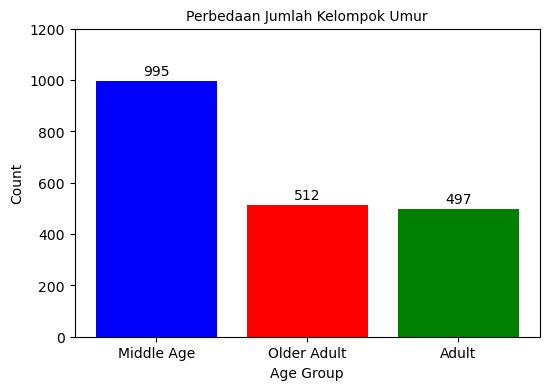

In [3451]:
# sns.barplot(data=df, x='Age_Group', y='count')#,errorbar=None,estimator='mean',hue='sex')
# plt.title('')
# plt.xlabel('')
# plt.ylabel('')
# plt.show
age_group = df['Age_Group'].value_counts().reset_index()

plt.figure(figsize=(6,4))
plt.bar(age_group['Age_Group'], age_group['count'], color=['blue','red','green'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.ylim(0,1200)
plt.title('Perbedaan Jumlah Kelompok Umur', fontsize=10)
for i, v in enumerate(age_group['count']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

- kelompok umur yang paling banyak adalah *Middle Age* dengan rentang umur 45-64 sebanyak 995 orang, kemudian *Older Adult Group* sebanyak 512 orang, dan yang paling sedikit *Adult* sebanyak 497 orang.

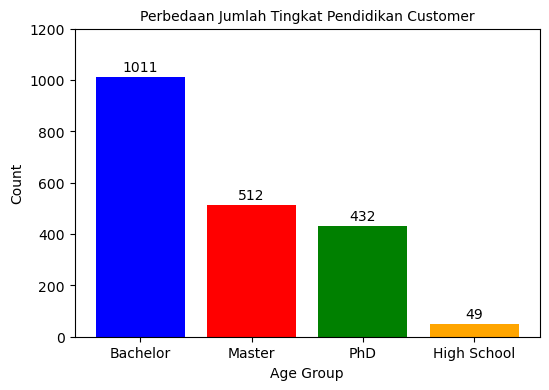

,Education,count
0,Bachelor,1011
1,Master,512
2,PhD,432
3,High School,49


In [3454]:
education = df['Education'].value_counts().reset_index()

plt.figure(figsize=(6,4))
plt.bar(education['Education'], education['count'], color=['blue','red','green','orange'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.ylim(0,1200)
plt.title('Perbedaan Jumlah Tingkat Pendidikan Customer', fontsize=10)
for i, v in enumerate(education['count']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

education

- Tingkat pendidikan customer yang paling banyak yaitu *Bachelor* sebanyak 1011 orang. kemudian *Master* sebanyak 512 orang, *Phd* sebanyak 432 orang. dan yang paling sedikit yaitu *High School* sebanyak 49 orang.

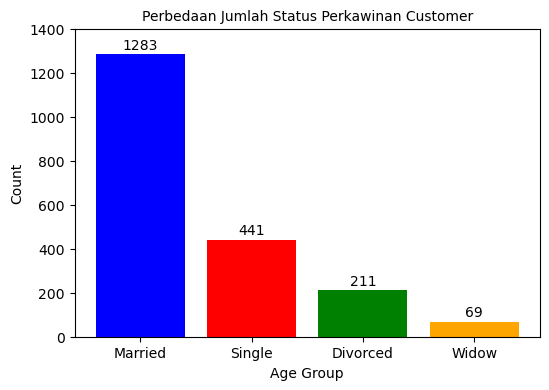

,Marital_Status,count
0,Married,1283
1,Single,441
2,Divorced,211
3,Widow,69


In [3457]:
Marital_Status = df['Marital_Status'].value_counts().reset_index()

plt.figure(figsize=(6,4))
plt.bar(Marital_Status['Marital_Status'], Marital_Status['count'], color=['blue','red','green','orange'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.ylim(0,1400)
plt.title('Perbedaan Jumlah Status Perkawinan Customer', fontsize=10)
for i, v in enumerate(Marital_Status['count']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

Marital_Status

- status perkawinan paling banyak yaitu *Married* sebanyak 1283 orang, kemudian *Single* sebanyak 441 orang, *Divorce* sebanyak 221 orang. dan yang paling sedikit *widow* sebanyak 69 orang

<function matplotlib.pyplot.show(close=None, block=None)>

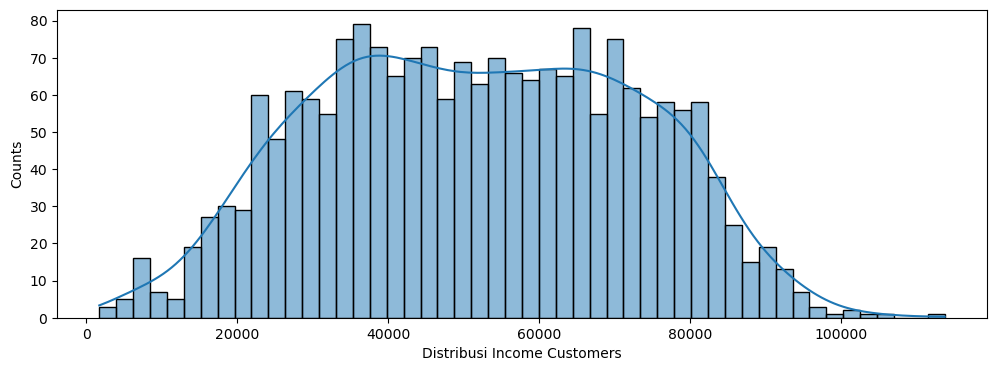

In [3460]:
plt.figure(figsize = (12,4))
sns.histplot(df['Income'],bins=50,kde=True)
plt.ylabel('Counts')
plt.xlabel('Distribusi Income Customers')
plt.show

- berdasarkan grafik diatas, pendapatan tahunan customer paling banyak berkisar antara 4000 - 70000

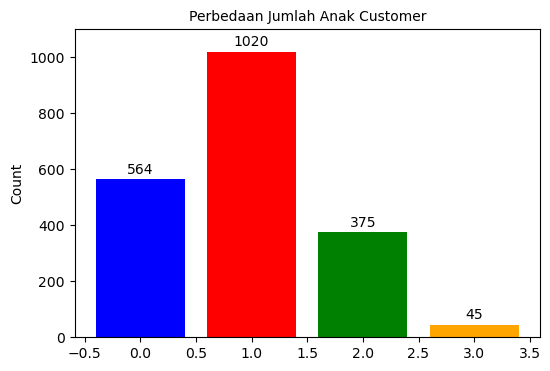

,Total_Children,count
1,0,564
0,1,1020
2,2,375
3,3,45


In [3463]:
total_children = df['Total_Children'].value_counts().reset_index().sort_values('Total_Children')
plt.figure(figsize=(6,4))
plt.bar(total_children['Total_Children'], total_children['count'], color=['blue','red','green','orange'])
plt.xlabel('')
plt.ylabel('Count')
plt.ylim(0,1100)
plt.title('Perbedaan Jumlah Anak Customer', fontsize=10)
for i, v in enumerate(total_children['count']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

total_children

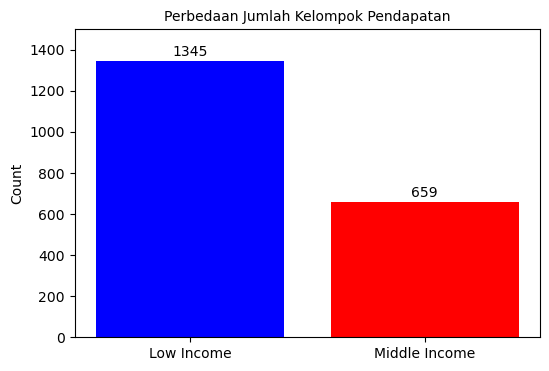

,Income_Group,count
0,Low Income,1345
1,Middle Income,659


In [3465]:
Income_Group = df['Income_Group'].value_counts().reset_index()


plt.figure(figsize=(6,4))
plt.bar(Income_Group['Income_Group'], Income_Group['count'], color=['blue','red'])
plt.xlabel('')
plt.ylabel('Count')
plt.ylim(0,1500)
plt.title('Perbedaan Jumlah Kelompok Pendapatan', fontsize=10)
for i, v in enumerate(Income_Group['count']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

Income_Group

- customer dengan 1 anak merupakan yang paling banyak yaitu sebanyak 1020, kemudian yang tidak memiliki anak sebanyak 564, customer dengan 2 anak sebanyak 375, kemudian customer dengan 3 anak yang pling sedikit sebanyak 45.

<function matplotlib.pyplot.show(close=None, block=None)>

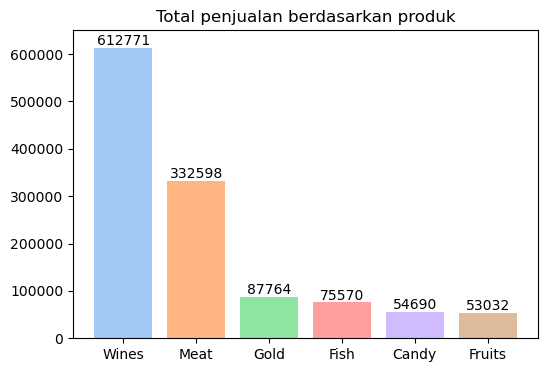

In [3468]:
df_mnt = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().reset_index()
df_mnt.rename(columns={0 : 'jumlah'},inplace=True)
df_mnt['index'].replace({'MntWines' : 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Candy','MntGoldProds':'Gold'},inplace=True)
df_mnt.sort_values('jumlah',ascending=False,inplace=True)
colors = sns.color_palette("pastel")

plt.figure(figsize=(6,4))
plt.bar(df_mnt['index'],df_mnt['jumlah'],color=colors)

plt.xticks()
plt.ylim(0,650000)
# plt.title('Average Total Bill Per Day')
for i, v in enumerate(df_mnt['jumlah']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.title('Total penjualan berdasarkan produk')
plt.show

- total penjualan paling tinggi yaitu produk wine dengan omset 612.771 usd, sedangkan produk dengan penjualan yang paling rendah yaitu Fruit dengan omset 53032 usd

### Analisis Proporsi Pembelian Produk Berdasarkan Demografi

<function matplotlib.pyplot.show(close=None, block=None)>

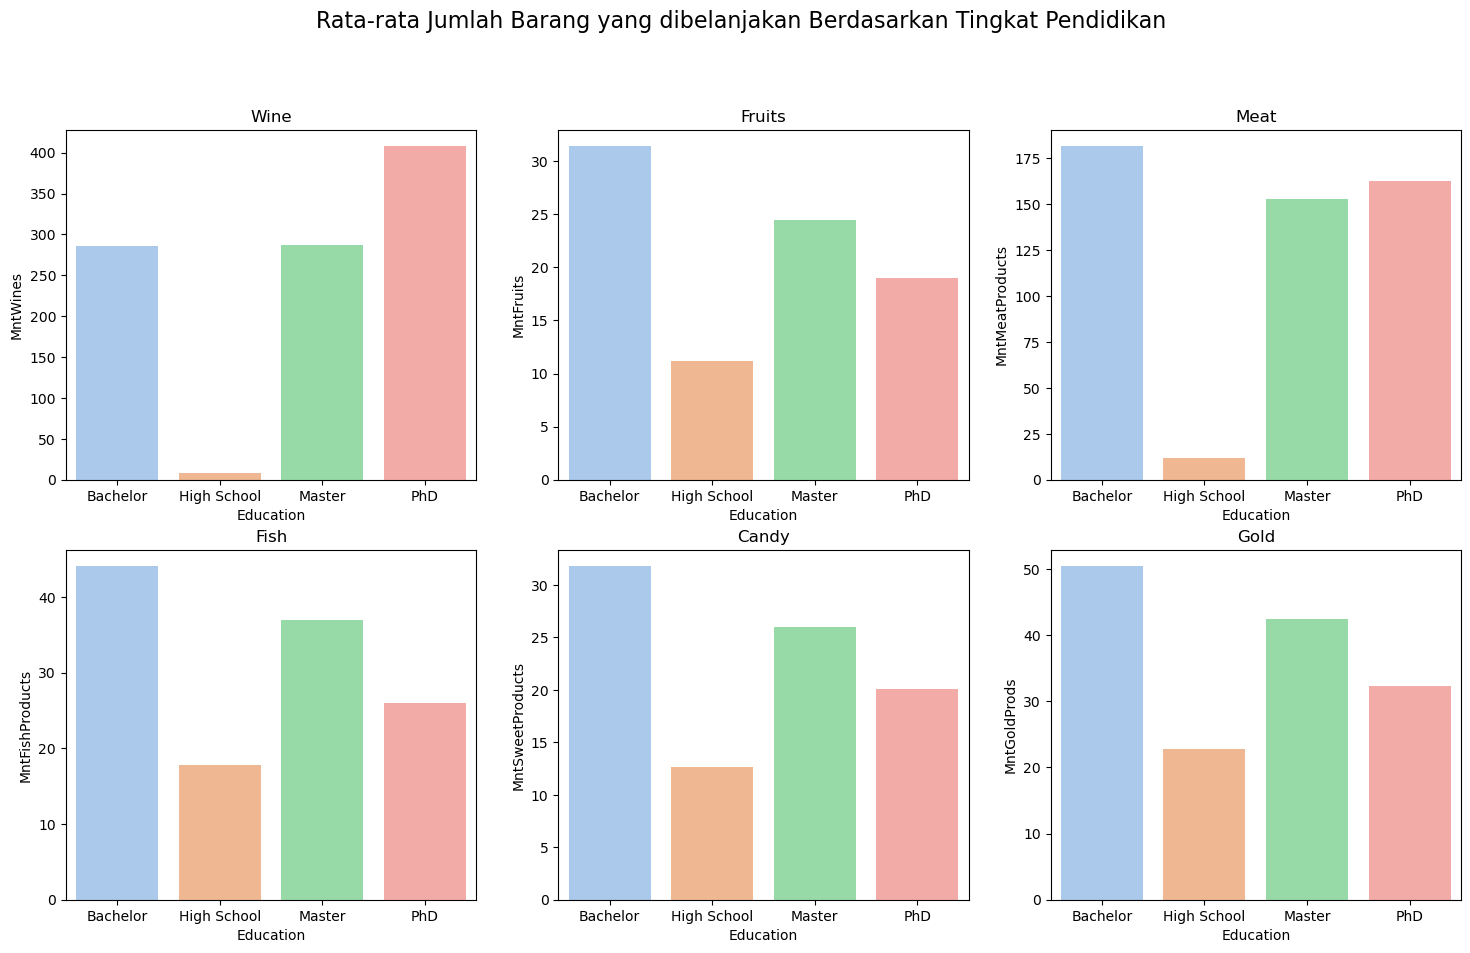

In [3472]:
education_mnt = df[['Education','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Education').mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x = education_mnt['Education'],y = education_mnt['MntWines'],ax=axs[0,0], palette='pastel')
axs[0, 0].set_title('Wine')
sns.barplot(x = education_mnt['Education'],y = education_mnt['MntFruits'],ax=axs[0,1], palette='pastel')
axs[0, 1].set_title('Fruits')
sns.barplot(x = education_mnt['Education'],y = education_mnt['MntMeatProducts'],ax=axs[0,2], palette='pastel')
axs[0, 2].set_title('Meat')
sns.barplot(x = education_mnt['Education'],y = education_mnt['MntFishProducts'],ax=axs[1,0], palette='pastel')
axs[1, 0].set_title('Fish')
sns.barplot(x = education_mnt['Education'],y = education_mnt['MntSweetProducts'],ax=axs[1,1], palette='pastel')
axs[1, 1].set_title('Candy')
sns.barplot(x = education_mnt['Education'],y = education_mnt['MntGoldProds'],ax=axs[1,2], palette='pastel')
axs[1, 2].set_title('Gold')
fig.suptitle('Rata-rata Jumlah Barang yang dibelanjakan Berdasarkan Tingkat Pendidikan', fontsize=16, y=1)
plt.savefig('Tingkat Pendidikan.png')
plt.show

- Untuk Produk Wine, rata-rata pengeluaran paling tinggi dilakukan oleh customer dengan tingkat pendidikan PhD, sedangkan yang paling rendah yaitu customer dengan tingkat pendidikan High School
- Untuk Produk Fruits, Meat, Fish, Candy, Gold,  rata-rata pengeluaran paling tinggi dilakukan oleh customer dengan tingkat pendidikan Bachelor, sedangkan yang paling rendah yaitu customer dengan tingkat pendidikan High School

<function matplotlib.pyplot.show(close=None, block=None)>

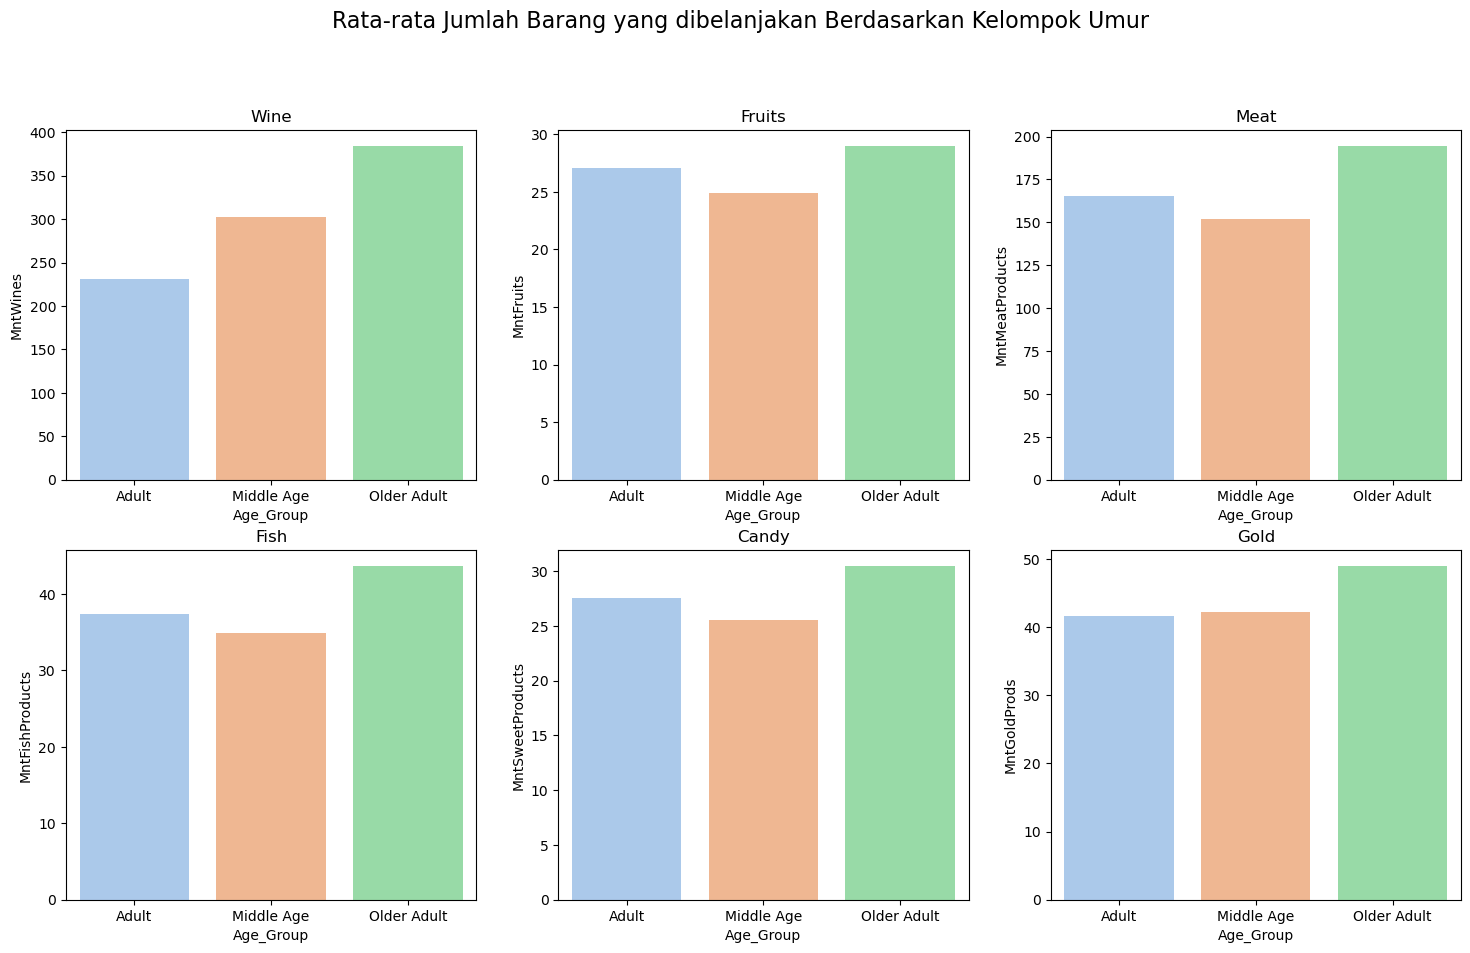

In [3474]:
ageGroup_mnt = df[['Age_Group','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Age_Group').mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x = ageGroup_mnt['Age_Group'],y = ageGroup_mnt['MntWines'],ax=axs[0,0], palette='pastel')
axs[0, 0].set_title('Wine')
sns.barplot(x = ageGroup_mnt['Age_Group'],y = ageGroup_mnt['MntFruits'],ax=axs[0,1], palette='pastel')
axs[0, 1].set_title('Fruits')
sns.barplot(x = ageGroup_mnt['Age_Group'],y = ageGroup_mnt['MntMeatProducts'],ax=axs[0,2], palette='pastel')
axs[0, 2].set_title('Meat')
sns.barplot(x = ageGroup_mnt['Age_Group'],y = ageGroup_mnt['MntFishProducts'],ax=axs[1,0], palette='pastel')
axs[1, 0].set_title('Fish')
sns.barplot(x = ageGroup_mnt['Age_Group'],y = ageGroup_mnt['MntSweetProducts'],ax=axs[1,1], palette='pastel')
axs[1, 1].set_title('Candy')
sns.barplot(x = ageGroup_mnt['Age_Group'],y = ageGroup_mnt['MntGoldProds'],ax=axs[1,2], palette='pastel')
axs[1, 2].set_title('Gold')
fig.suptitle('Rata-rata Jumlah Barang yang dibelanjakan Berdasarkan Kelompok Umur', fontsize=16, y=1)
plt.savefig('Kelompok Umur.png')
plt.show

- untuk kelompok umur, rata-rata pengeluaran paling tinggi untuk semua produk dilakukan oleh customer dengan kelompok umur Older Adult (usia 64 tahun keatas).

<function matplotlib.pyplot.show(close=None, block=None)>

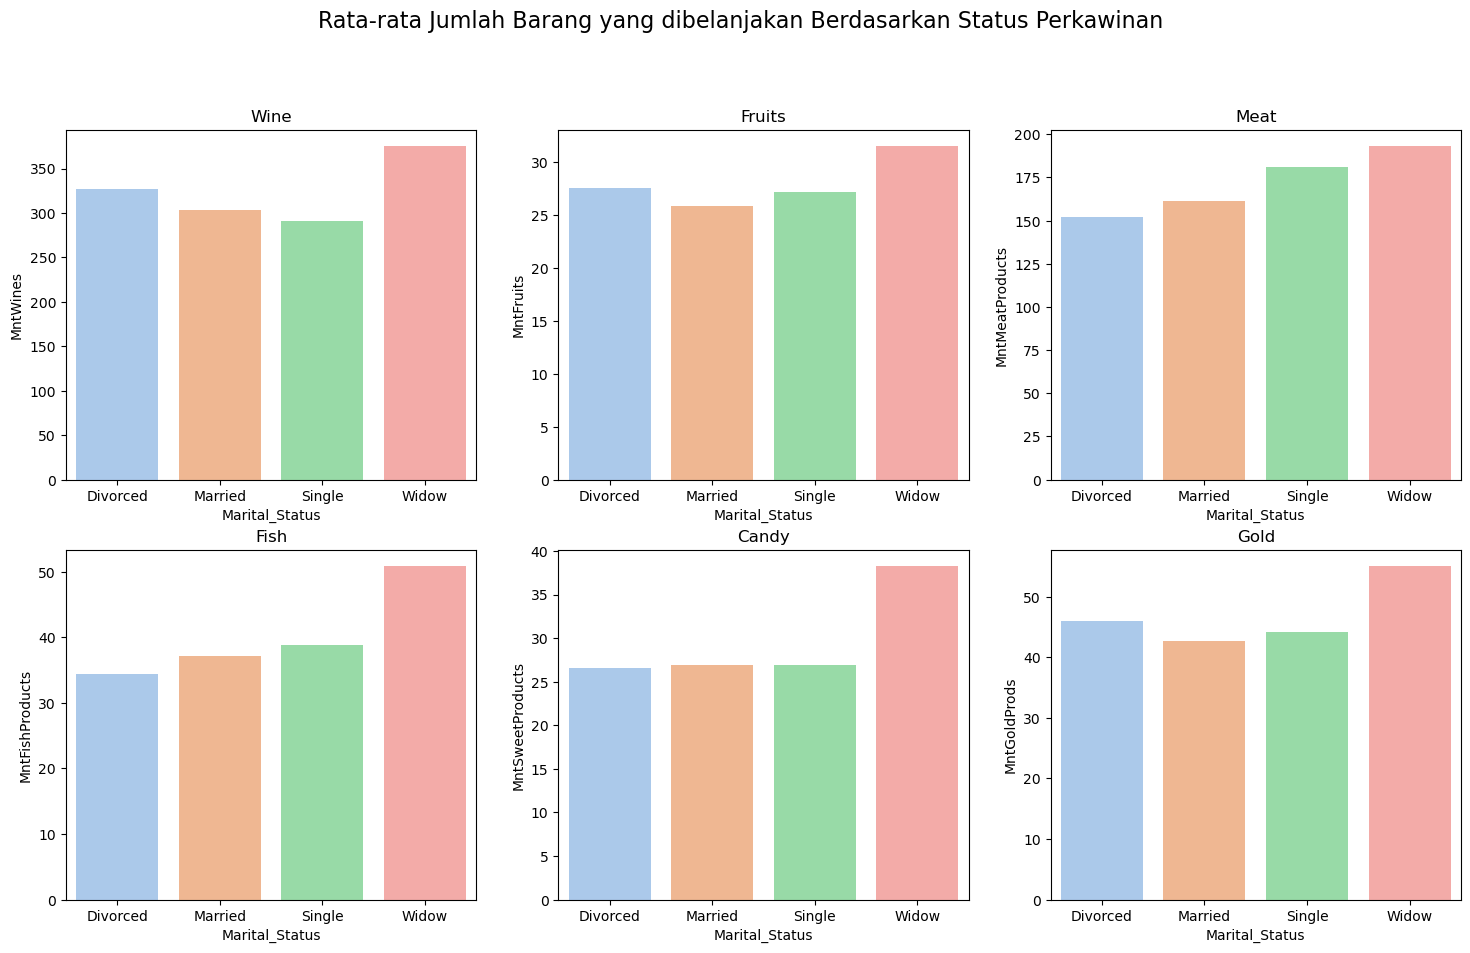

In [3478]:
maritalStatus_mnt = df[['Marital_Status','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Marital_Status').mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x = maritalStatus_mnt['Marital_Status'],y = maritalStatus_mnt['MntWines'],ax=axs[0,0], palette='pastel')
axs[0, 0].set_title('Wine')
sns.barplot(x = maritalStatus_mnt['Marital_Status'],y = maritalStatus_mnt['MntFruits'],ax=axs[0,1], palette='pastel')
axs[0, 1].set_title('Fruits')
sns.barplot(x = maritalStatus_mnt['Marital_Status'],y = maritalStatus_mnt['MntMeatProducts'],ax=axs[0,2], palette='pastel')
axs[0, 2].set_title('Meat')
sns.barplot(x = maritalStatus_mnt['Marital_Status'],y = maritalStatus_mnt['MntFishProducts'],ax=axs[1,0], palette='pastel')
axs[1, 0].set_title('Fish')
sns.barplot(x = maritalStatus_mnt['Marital_Status'],y = maritalStatus_mnt['MntSweetProducts'],ax=axs[1,1], palette='pastel')
axs[1, 1].set_title('Candy')
sns.barplot(x = maritalStatus_mnt['Marital_Status'],y = maritalStatus_mnt['MntGoldProds'],ax=axs[1,2], palette='pastel')
axs[1, 2].set_title('Gold')
fig.suptitle('Rata-rata Jumlah Barang yang dibelanjakan Berdasarkan Status Perkawinan', fontsize=16, y=1)
plt.savefig('Status Perkawinan.png')
plt.show

- untuk status perkawinan, customer dengan status perkawinan Widow merupakan customer dengan pengeluaran rata-rata tertinggi untuk setiap produk.

,Total_Children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,496.79,53.02,372.28,77.04,54.06,64.16
1,1,266.61,19.43,98.22,26.90,20.34,40.22
2,2,142.39,8.06,52.49,11.83,8.55,25.91
3,3,160.98,6.51,61.58,5.42,5.56,18.56


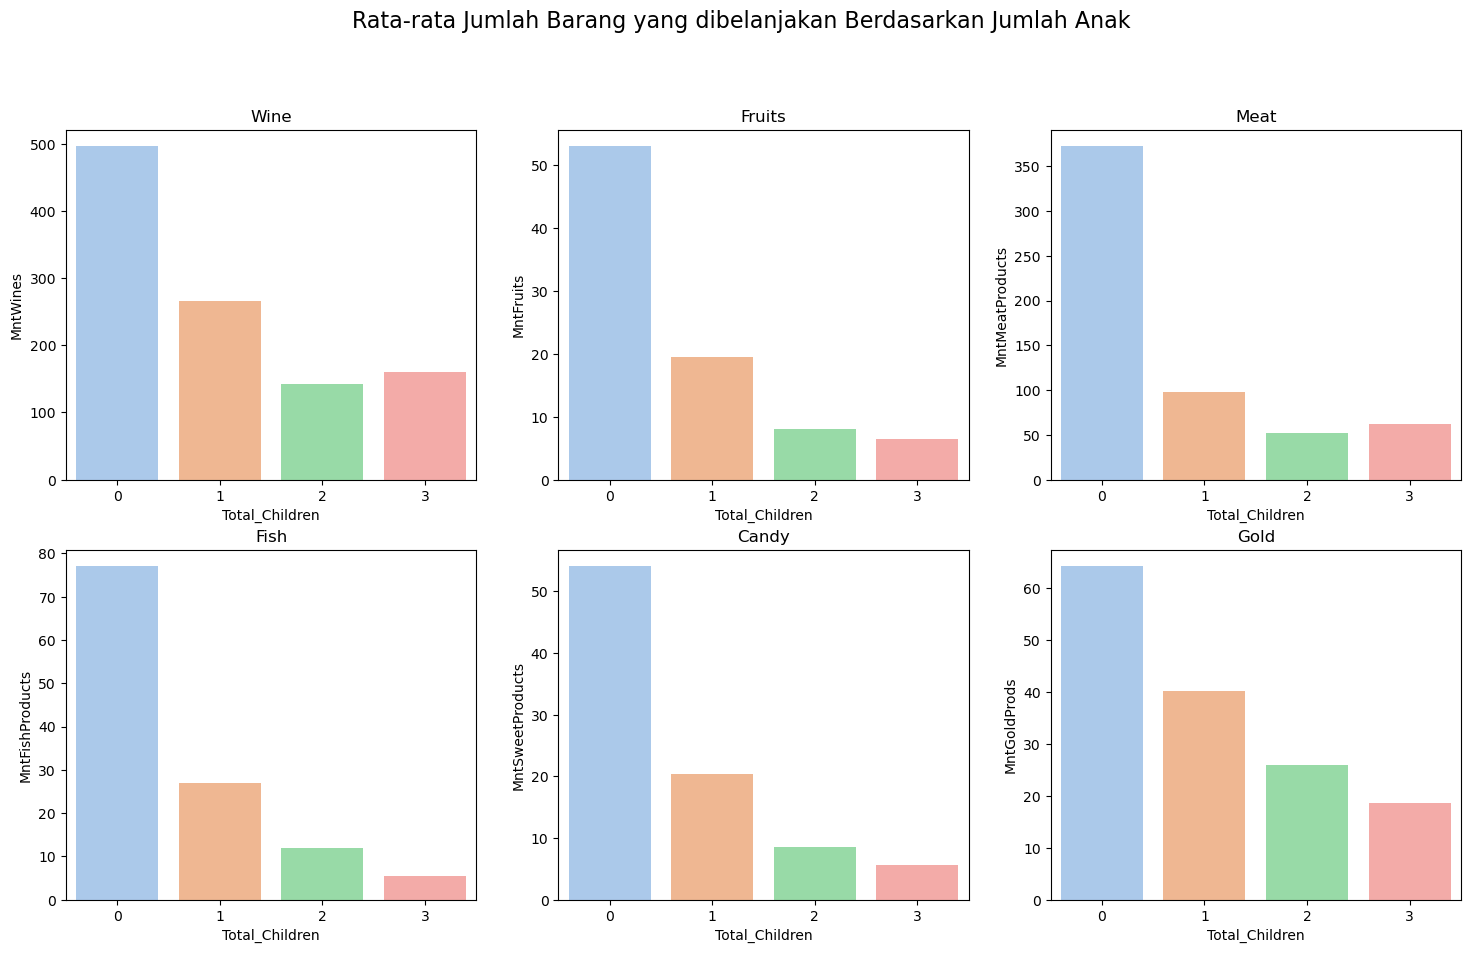

In [3481]:
totalChildren_mnt = (df[['Total_Children','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Total_Children').mean().reset_index()).round(2)


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x = totalChildren_mnt['Total_Children'],y = totalChildren_mnt['MntWines'],ax=axs[0,0], palette='pastel')
axs[0, 0].set_title('Wine')
sns.barplot(x = totalChildren_mnt['Total_Children'],y = totalChildren_mnt['MntFruits'],ax=axs[0,1], palette='pastel')
axs[0, 1].set_title('Fruits')
sns.barplot(x = totalChildren_mnt['Total_Children'],y = totalChildren_mnt['MntMeatProducts'],ax=axs[0,2], palette='pastel')
axs[0, 2].set_title('Meat')
sns.barplot(x = totalChildren_mnt['Total_Children'],y = totalChildren_mnt['MntFishProducts'],ax=axs[1,0], palette='pastel')
axs[1, 0].set_title('Fish')
sns.barplot(x = totalChildren_mnt['Total_Children'],y = totalChildren_mnt['MntSweetProducts'],ax=axs[1,1], palette='pastel')
axs[1, 1].set_title('Candy')
sns.barplot(x = totalChildren_mnt['Total_Children'],y = totalChildren_mnt['MntGoldProds'],ax=axs[1,2], palette='pastel')
axs[1, 2].set_title('Gold')
fig.suptitle('Rata-rata Jumlah Barang yang dibelanjakan Berdasarkan Jumlah Anak', fontsize=16, y=1)
plt.savefig('Jumlah Anak.png')
plt.show
totalChildren_mnt

<function matplotlib.pyplot.show(close=None, block=None)>

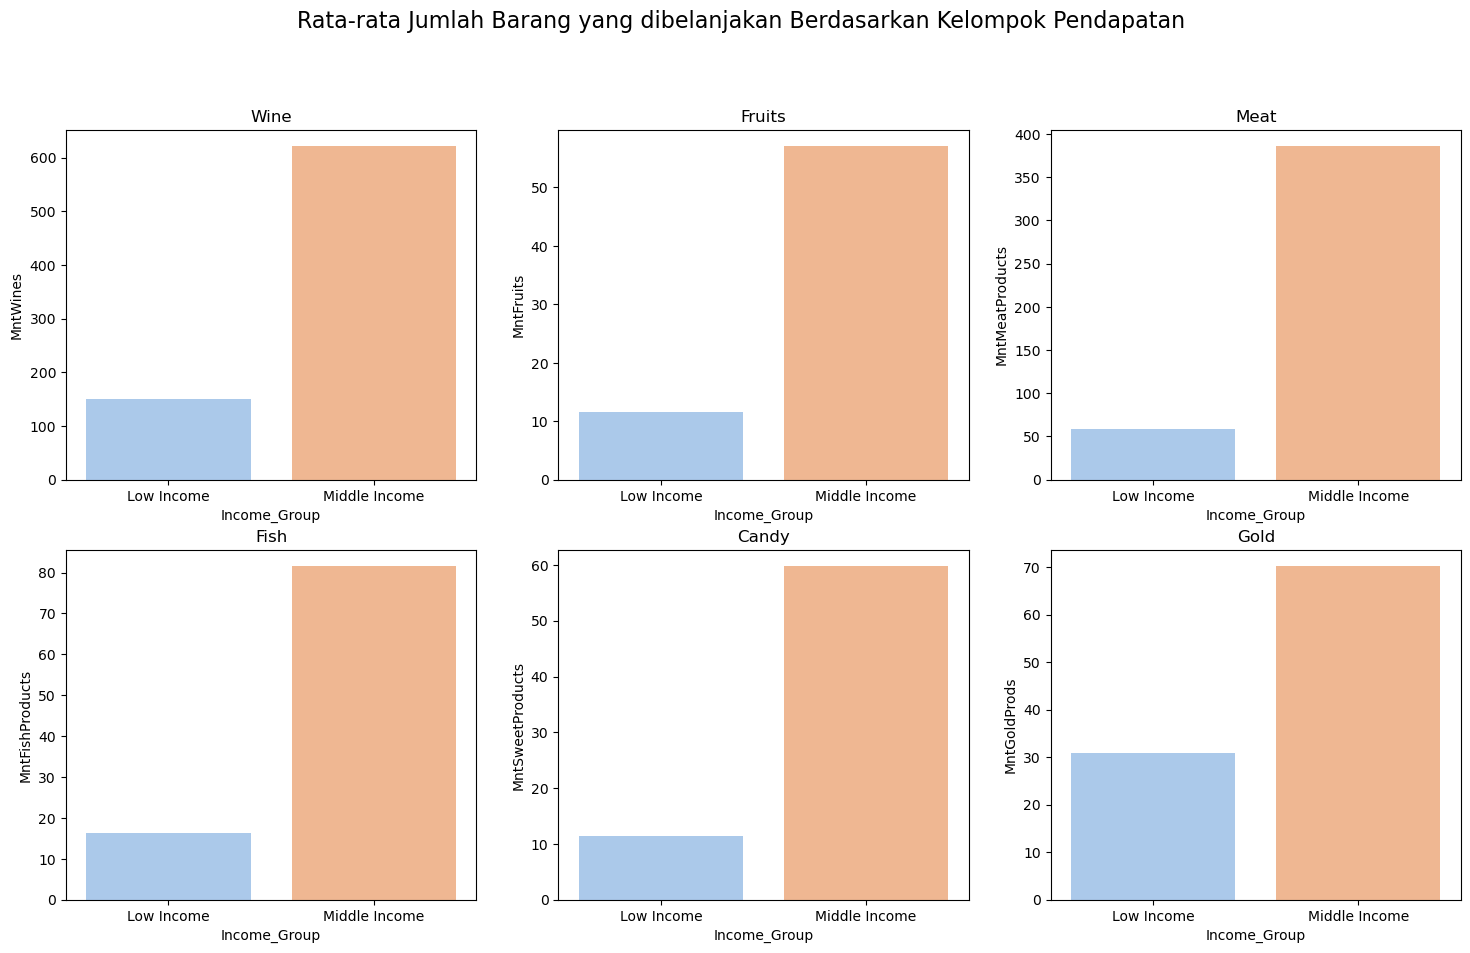

In [3482]:
Income_Group_mnt = df[['Income_Group','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Income_Group').mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x = Income_Group_mnt['Income_Group'],y = Income_Group_mnt['MntWines'],ax=axs[0,0], palette='pastel')
axs[0, 0].set_title('Wine')
sns.barplot(x = Income_Group_mnt['Income_Group'],y = Income_Group_mnt['MntFruits'],ax=axs[0,1], palette='pastel')
axs[0, 1].set_title('Fruits')
sns.barplot(x = Income_Group_mnt['Income_Group'],y = Income_Group_mnt['MntMeatProducts'],ax=axs[0,2], palette='pastel')
axs[0, 2].set_title('Meat')
sns.barplot(x = Income_Group_mnt['Income_Group'],y = Income_Group_mnt['MntFishProducts'],ax=axs[1,0], palette='pastel')
axs[1, 0].set_title('Fish')
sns.barplot(x = Income_Group_mnt['Income_Group'],y = Income_Group_mnt['MntSweetProducts'],ax=axs[1,1], palette='pastel')
axs[1, 1].set_title('Candy')
sns.barplot(x = Income_Group_mnt['Income_Group'],y = Income_Group_mnt['MntGoldProds'],ax=axs[1,2], palette='pastel')
axs[1, 2].set_title('Gold')
fig.suptitle('Rata-rata Jumlah Barang yang dibelanjakan Berdasarkan Kelompok Pendapatan', fontsize=16, y=1)
plt.savefig('Kelompok Pendapatan.png')
plt.show

- Customer yang tidak memiliki anak merupakan customer dengan pengeluaran rata-rata tertinggi untuk setiap produk.

### Analisis proporsi pembelian customer berdasarkan demografi

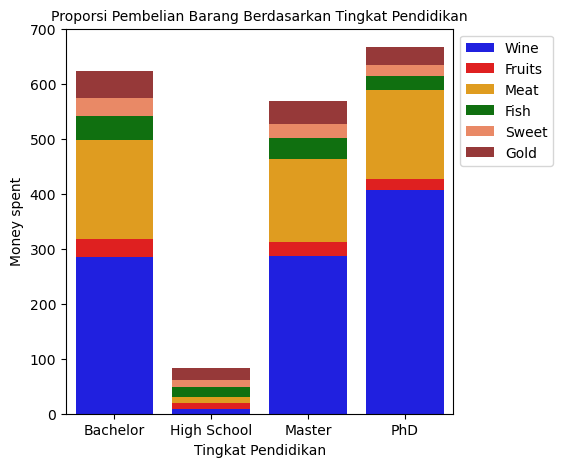

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Bachelor,285.96,31.39,181.52,44.03,31.75,50.37
1,High School,7.80,11.20,11.82,17.73,12.61,22.76
2,Master,287.46,24.46,152.85,37.01,25.96,42.46
3,PhD,407.65,19.03,162.61,26.00,20.10,32.37


In [3485]:

df_edu = (df[['Education','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Education').mean().reset_index()).round(2)
plt.figure(figsize=(5,5))
sns.barplot(x='Education', y='MntWines', data=df_edu, label='Wine', color='blue')
sns.barplot(x='Education', y='MntFruits', data=df_edu, label='Fruits', color='red', bottom=df_edu['MntWines'])
sns.barplot(x='Education', y='MntMeatProducts', data=df_edu, label='Meat', color='orange', bottom=df_edu['MntWines'] + df_edu['MntFruits'])
sns.barplot(x='Education', y='MntFishProducts', data=df_edu, label='Fish', color='green', bottom=df_edu['MntWines'] + df_edu['MntFruits'] + df_edu['MntMeatProducts'] )
sns.barplot(x='Education', y='MntSweetProducts', data=df_edu, label='Sweet', color='coral', bottom=df_edu['MntWines'] + df_edu['MntFruits'] + df_edu['MntMeatProducts'] + df_edu['MntFishProducts'] )
sns.barplot(x='Education', y='MntGoldProds', data=df_edu, label='Gold', color='brown', bottom=df_edu['MntWines'] + df_edu['MntFruits'] + df_edu['MntMeatProducts'] + df_edu['MntFishProducts'] + df_edu['MntSweetProducts'] )
plt.title('Proporsi Pembelian Barang Berdasarkan Tingkat Pendidikan',fontsize = 10)
plt.ylabel('Money spent')
plt.xlabel('Tingkat Pendidikan')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
df_edu

- untuk tingkat pendidikan bachelor, Master dan PhD, proporsi rata-rata pengeluaran paling besar terdapat pada produk wine, sementara pada tingkat pendidikan High school, pengeluran cenderung seimbang terhadap setiap produk

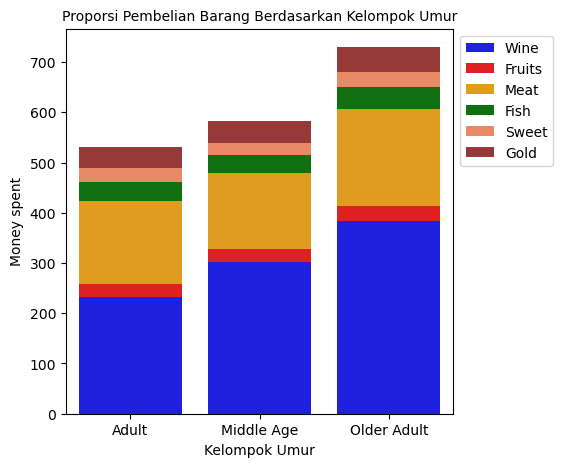

,Age_Group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Adult,231.49,27.07,165.14,37.33,27.52,41.58
1,Middle Age,302.78,24.88,151.80,34.87,25.56,42.26
2,Older Adult,383.70,28.95,194.30,43.60,30.42,48.93


In [3488]:
df_ageGroup = (df[['Age_Group','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Age_Group').mean().reset_index()).round(2)
plt.figure(figsize=(5,5))
sns.barplot(x='Age_Group', y='MntWines', data=df_ageGroup, label='Wine', color='blue')
sns.barplot(x='Age_Group', y='MntFruits', data=df_ageGroup, label='Fruits', color='red', bottom=df_ageGroup['MntWines'])
sns.barplot(x='Age_Group', y='MntMeatProducts', data=df_ageGroup, label='Meat', color='orange', bottom=df_ageGroup['MntWines'] + df_ageGroup['MntFruits'])
sns.barplot(x='Age_Group', y='MntFishProducts', data=df_ageGroup, label='Fish', color='green', bottom=df_ageGroup['MntWines'] + df_ageGroup['MntFruits'] + df_ageGroup['MntMeatProducts'] )
sns.barplot(x='Age_Group', y='MntSweetProducts', data=df_ageGroup, label='Sweet', color='coral', bottom=df_ageGroup['MntWines'] + df_ageGroup['MntFruits'] + df_ageGroup['MntMeatProducts'] + df_ageGroup['MntFishProducts'] )
sns.barplot(x='Age_Group', y='MntGoldProds', data=df_ageGroup, label='Gold', color='brown', bottom=df_ageGroup['MntWines'] + df_ageGroup['MntFruits'] + df_ageGroup['MntMeatProducts'] + df_ageGroup['MntFishProducts'] + df_ageGroup['MntSweetProducts'] )
plt.title('Proporsi Pembelian Barang Berdasarkan Kelompok Umur',fontsize = 10)
plt.ylabel('Money spent')
plt.xlabel('Kelompok Umur')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
df_ageGroup

- semua kelompok grup memiliki  proporsi rata-rata pengeluaran terbesar terhadap produk wine.

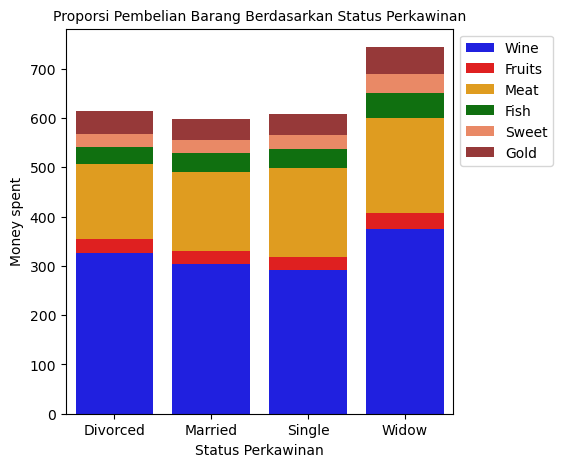

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Divorced,326.79,27.51,152.24,34.40,26.55,46.04
1,Married,303.76,25.80,161.54,37.17,26.94,42.68
2,Single,290.74,27.10,181.17,38.80,26.96,44.19
3,Widow,375.09,31.46,193.10,50.84,38.25,55.06


In [3491]:
df_maritalStatus = (df[['Marital_Status','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Marital_Status').mean().reset_index()).round(2)
plt.figure(figsize=(5,5))
sns.barplot(x='Marital_Status', y='MntWines', data=df_maritalStatus, label='Wine', color='blue')
sns.barplot(x='Marital_Status', y='MntFruits', data=df_maritalStatus, label='Fruits', color='red', bottom=df_maritalStatus['MntWines'])
sns.barplot(x='Marital_Status', y='MntMeatProducts', data=df_maritalStatus, label='Meat', color='orange', bottom=df_maritalStatus['MntWines'] + df_maritalStatus['MntFruits'])
sns.barplot(x='Marital_Status', y='MntFishProducts', data=df_maritalStatus, label='Fish', color='green', bottom=df_maritalStatus['MntWines'] + df_maritalStatus['MntFruits'] + df_maritalStatus['MntMeatProducts'] )
sns.barplot(x='Marital_Status', y='MntSweetProducts', data=df_maritalStatus, label='Sweet', color='coral', bottom=df_maritalStatus['MntWines'] + df_maritalStatus['MntFruits'] + df_maritalStatus['MntMeatProducts'] + df_maritalStatus['MntFishProducts'] )
sns.barplot(x='Marital_Status', y='MntGoldProds', data=df_maritalStatus, label='Gold', color='brown', bottom=df_maritalStatus['MntWines'] + df_maritalStatus['MntFruits'] + df_maritalStatus['MntMeatProducts'] + df_maritalStatus['MntFishProducts'] + df_maritalStatus['MntSweetProducts'] )
plt.title('Proporsi Pembelian Barang Berdasarkan Status Perkawinan',fontsize = 10)
plt.ylabel('Money spent')
plt.xlabel('Status Perkawinan')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
df_maritalStatus

- semua status pernikahan memiliki proporsi rata-rata pengeluaran terbesar pada produk wine

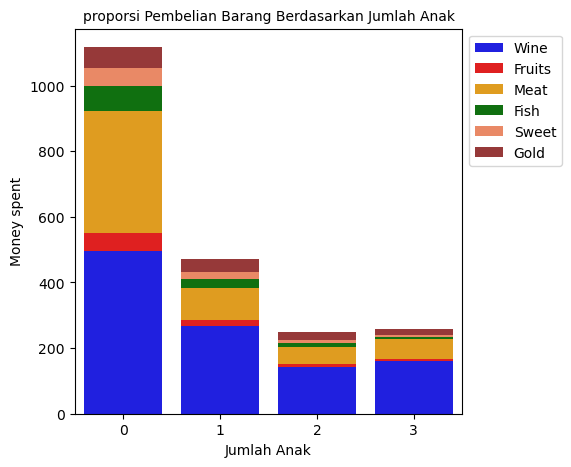

,Total_Children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,496.79,53.02,372.28,77.04,54.06,64.16
1,1,266.61,19.43,98.22,26.90,20.34,40.22
2,2,142.39,8.06,52.49,11.83,8.55,25.91
3,3,160.98,6.51,61.58,5.42,5.56,18.56


In [3494]:
df_totalChildren = (df[['Total_Children','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Total_Children').mean().reset_index()).round(2)

plt.figure(figsize=(5,5))
sns.barplot(x='Total_Children', y='MntWines', data=df_totalChildren, label='Wine', color='blue')
sns.barplot(x='Total_Children', y='MntFruits', data=df_totalChildren, label='Fruits', color='red', bottom=df_totalChildren['MntWines'])
sns.barplot(x='Total_Children', y='MntMeatProducts', data=df_totalChildren, label='Meat', color='orange', bottom=df_totalChildren['MntWines'] + df_totalChildren['MntFruits'])
sns.barplot(x='Total_Children', y='MntFishProducts', data=df_totalChildren, label='Fish', color='green', bottom=df_totalChildren['MntWines'] + df_totalChildren['MntFruits'] + df_totalChildren['MntMeatProducts'] )
sns.barplot(x='Total_Children', y='MntSweetProducts', data=df_totalChildren, label='Sweet', color='coral', bottom=df_totalChildren['MntWines'] + df_totalChildren['MntFruits'] + df_totalChildren['MntMeatProducts'] + df_totalChildren['MntFishProducts'] )
sns.barplot(x='Total_Children', y='MntGoldProds', data=df_totalChildren, label='Gold', color='brown', bottom=df_totalChildren['MntWines'] + df_totalChildren['MntFruits'] + df_totalChildren['MntMeatProducts'] + df_totalChildren['MntFishProducts'] + df_totalChildren['MntSweetProducts'] )
plt.title('proporsi Pembelian Barang Berdasarkan Jumlah Anak',fontsize = 10)
plt.ylabel('Money spent')
plt.xlabel('Jumlah Anak')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

df_totalChildren

- untuk semua kategori jumlah anak memiliki proporsi rata-rata pengeluaran terbesar terhadap wine

In [3499]:
df['Income_Group'].value_counts()

Income_Group
Low Income       1345
Middle Income     659
Name: count, dtype: int64

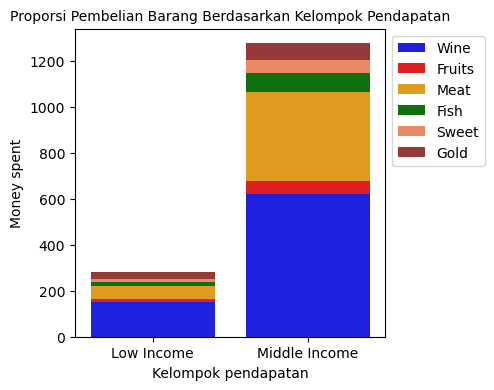

,Income_Group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Low Income,151.31,11.50,58.41,16.25,11.39,30.89
1,Middle Income,621.03,56.99,385.49,81.51,59.73,70.13


In [3501]:
df_incomeGroup = (df[['Income_Group','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby('Income_Group').mean().reset_index()).round(2)


plt.figure(figsize=(4,4))
sns.barplot(x='Income_Group', y='MntWines', data=df_incomeGroup, label='Wine', color='blue')
sns.barplot(x='Income_Group', y='MntFruits', data=df_incomeGroup, label='Fruits', color='red', bottom=df_incomeGroup['MntWines'])
sns.barplot(x='Income_Group', y='MntMeatProducts', data=df_incomeGroup, label='Meat', color='orange', bottom=df_incomeGroup['MntWines'] + df_incomeGroup['MntFruits'])
sns.barplot(x='Income_Group', y='MntFishProducts', data=df_incomeGroup, label='Fish', color='green', bottom=df_incomeGroup['MntWines'] + df_incomeGroup['MntFruits'] + df_incomeGroup['MntMeatProducts'] )
sns.barplot(x='Income_Group', y='MntSweetProducts', data=df_incomeGroup, label='Sweet', color='coral', bottom=df_incomeGroup['MntWines'] + df_incomeGroup['MntFruits'] + df_incomeGroup['MntMeatProducts'] + df_incomeGroup['MntFishProducts'] )
sns.barplot(x='Income_Group', y='MntGoldProds', data=df_incomeGroup, label='Gold', color='brown', bottom=df_incomeGroup['MntWines'] + df_incomeGroup['MntFruits'] + df_incomeGroup['MntMeatProducts'] + df_incomeGroup['MntFishProducts'] + df_incomeGroup['MntSweetProducts'] )
plt.title('Proporsi Pembelian Barang Berdasarkan Kelompok Pendapatan',fontsize = 10)
plt.ylabel('Money spent')
plt.xlabel('Kelompok pendapatan')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

df_incomeGroup

- untuk kelompok Pendapatan, baik untuk Low dan Middle income memiliki proporsi rata-rata pengeluaran terbesar pada produk wine.

### Analisis Demografi berdasarkan Tempat pembelian

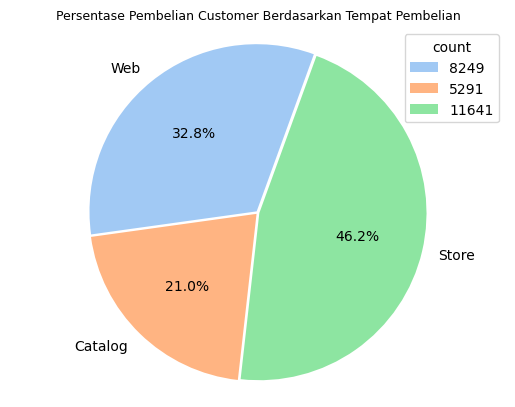

,index,jumlah
0,Web,8249
1,Catalog,5291
2,Store,11641


In [3506]:
df_purchase = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().reset_index()
df_purchase.rename(columns={0 : 'jumlah'},inplace=True)
df_purchase['index'].replace({'NumWebPurchases' : 'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'},inplace=True)

plt.pie(df_purchase['jumlah'],
        labels=df_purchase['index'],
        colors=colors, 
        autopct='%1.1f%%',  # Menampilkan persentase dengan 1 angka desimal
        startangle=70,
        explode = ([0.01,0.01,0.01])
       )
plt.legend(df_purchase['jumlah'], title="count", loc="upper right")
plt.axis('equal')
plt.title('Persentase Pembelian Customer Berdasarkan Tempat Pembelian',fontsize=9)
plt.show()
df_purchase

- tempat pembelian customer yang paling banyak yaitu terdapat pada Toko fisik sebesar 46.2%, kemudian Web sebesar 32.8%, dan yang paling sedikit yaitu pembeian menggunakan Katalog sebesar 21.0%

In [3509]:
# edu_purchase = edu_purchase.reset_index()

In [3511]:
edu_purchase = (df[['Education','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby('Education').sum().reset_index()).round(2)
edu_purchase = edu_purchase.set_index('Education').transpose()
edu_purchase = edu_purchase.reset_index()
edu_purchase

Education,index,Bachelor,High School,Master,PhD
0,NumWebPurchases,4201,94,2020,1934
1,NumCatalogPurchases,2759,24,1274,1234
2,NumStorePurchases,5918,141,2956,2626


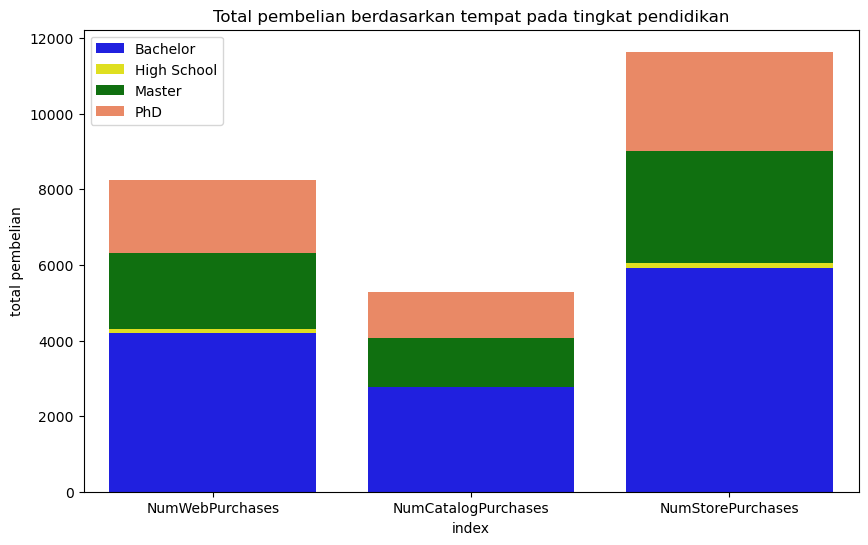

Education,index,Bachelor,High School,Master,PhD
0,NumWebPurchases,4201,94,2020,1934
1,NumCatalogPurchases,2759,24,1274,1234
2,NumStorePurchases,5918,141,2956,2626


In [3513]:
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='Bachelor', data=edu_purchase, label='Bachelor', color='blue')
sns.barplot(x='index', y='High School', data=edu_purchase, label='High School', color='yellow', bottom=edu_purchase['Bachelor'])
sns.barplot(x='index', y='Master', data=edu_purchase, label='Master', color='green', bottom=edu_purchase['Bachelor'] + edu_purchase['High School'])
sns.barplot(x='index', y='PhD', data=edu_purchase, label='PhD', color='coral', bottom=edu_purchase['Bachelor'] + edu_purchase['High School'] + edu_purchase['Master'])
plt.title('Total pembelian berdasarkan tempat pada tingkat pendidikan')
plt.ylabel('total pembelian')
plt.legend()
plt.show()
edu_purchase

- untuk semua tempat tingkat pendidikan bachelor merupakan yang memberikan konribusi pembelian paling tinggi. hal ini dikarenakan customer dengan tingkat pendidikan Bachelor memang yang paling banyak.

<Figure size 400x400 with 0 Axes>

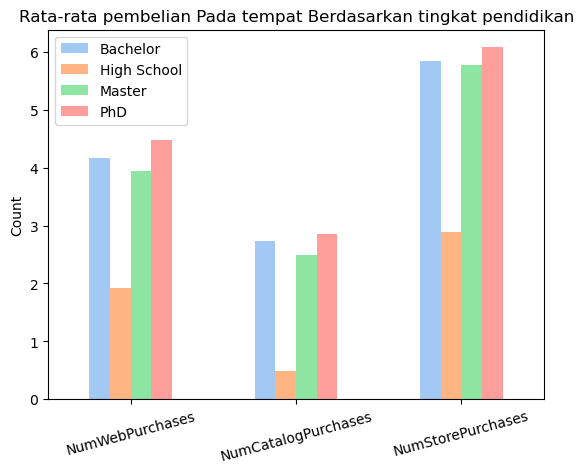

Education,index,Bachelor,High School,Master,PhD
0,NumWebPurchases,4201,94,2020,1934
1,NumCatalogPurchases,2759,24,1274,1234
2,NumStorePurchases,5918,141,2956,2626


In [3516]:
edu_purchase_mean = (df[['Education','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby('Education').mean().reset_index()).round(2)
edu_purchase_mean = edu_purchase_mean.set_index('Education').transpose()
colors = sns.color_palette('pastel')
plt.figure(figsize=(4,4))
edu_purchase_mean.plot(kind='bar', color=colors)
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.ylim()
plt.title('Rata-rata pembelian Pada tempat Berdasarkan tingkat pendidikan')
# plt.legend(loc='upper right',fontsize = 8,bbox_to_anchor=(1, 1))
plt.legend(loc = 'upper left')
plt.show()

edu_purchase

- untuk semua tempat pembelian,tingkat pendidikan PhD merupakan yang tertinggi rata-rata pembeliannya dibanding kan dengan tingkat pendidikan yang lain.

<Figure size 400x400 with 0 Axes>

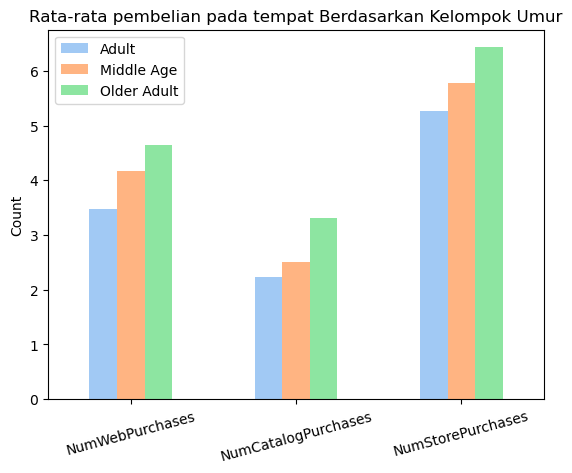

Age_Group,Adult,Middle Age,Older Adult
NumWebPurchases,3.48,4.16,4.65
NumCatalogPurchases,2.23,2.50,3.31
NumStorePurchases,5.26,5.77,6.43


In [3519]:
Age_Group_mean = (df[['Age_Group','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby('Age_Group').mean().reset_index()).round(2)
Age_Group_mean = Age_Group_mean.set_index('Age_Group').transpose()

colors = sns.color_palette('pastel')
plt.figure(figsize=(4,4))
Age_Group_mean.plot(kind='bar', color=colors)
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.ylim()
plt.title('Rata-rata pembelian pada tempat Berdasarkan Kelompok Umur')
# plt.legend(loc='upper right',fontsize = 8,bbox_to_anchor=(1, 1))
plt.legend(loc='upper left')
plt.show()

Age_Group_mean

- berdasarkan grafik diatas, kelompok umur older adult merupakan yang tertinggi rata-rata pembeliannya pada setiap tempat.

<Figure size 600x600 with 0 Axes>

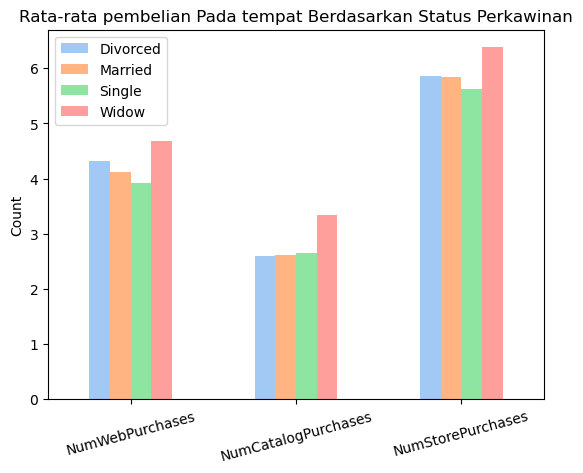

Marital_Status,Divorced,Married,Single,Widow
NumWebPurchases,4.32,4.12,3.91,4.68
NumCatalogPurchases,2.60,2.61,2.65,3.33
NumStorePurchases,5.85,5.84,5.62,6.38


In [3522]:
Marital_Status_mean = (df[['Marital_Status','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby('Marital_Status').mean().reset_index()).round(2)
Marital_Status_mean = Marital_Status_mean.set_index('Marital_Status').transpose()

colors = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
Marital_Status_mean.plot(kind='bar', color=colors)
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.ylim()
plt.title('Rata-rata pembelian Pada tempat Berdasarkan Status Perkawinan')
# plt.legend(loc='upper right',fontsize = 8,bbox_to_anchor=(1, 1))
plt.legend(loc='upper left')
plt.show()

Marital_Status_mean

- status pernikahan widow merupakan yang memiliki rata-rata pembelian tertinggi berdasarkan status pernikahan pada semua tempat.

<Figure size 600x600 with 0 Axes>

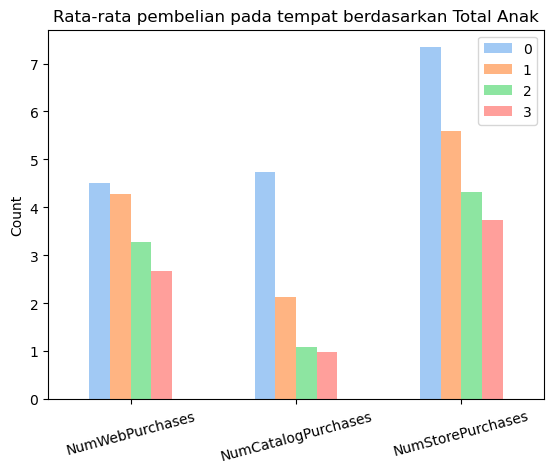

Total_Children,0,1,2,3
NumWebPurchases,4.50,4.28,3.27,2.67
NumCatalogPurchases,4.73,2.13,1.09,0.98
NumStorePurchases,7.34,5.60,4.33,3.73


In [3525]:
Total_Children_mean = (df[['Total_Children','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby('Total_Children').mean().reset_index()).round(2)
Total_Children_mean = Total_Children_mean.set_index('Total_Children').transpose()

colors = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
Total_Children_mean.plot(kind='bar', color=colors)
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.ylim()
plt.title('Rata-rata pembelian pada tempat berdasarkan Total Anak')
# plt.legend(loc='upper right',fontsize = 8,bbox_to_anchor=(1, 1))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Total_Children_mean

berdasarkan grafik diatas, customer yang tidak memiliki anak merupakan yang tertinggi rata-rata pembeliannya di semua tempat. juga bisa dilihat bahwa jumlah anak mempengaruhi jumlah pembelian customer. semakin banyak anak maka jumlah pembeliannya semakin berkurang.

<Figure size 600x600 with 0 Axes>

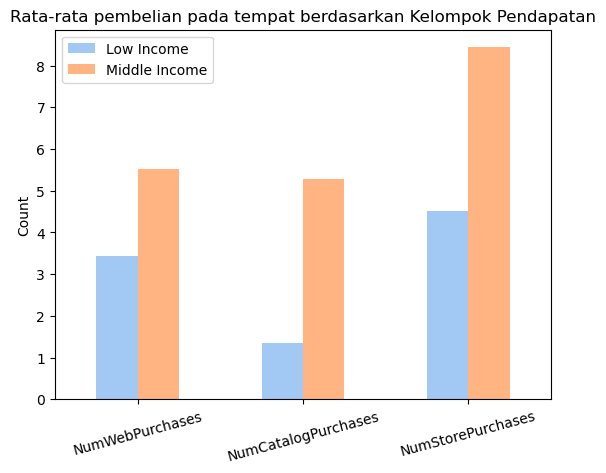

Income_Group,Low Income,Middle Income
NumWebPurchases,3.43,5.51
NumCatalogPurchases,1.34,5.29
NumStorePurchases,4.52,8.44


In [3528]:
Income_Group_mean = (df[['Income_Group','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby('Income_Group').mean().reset_index()).round(2)
Income_Group_mean = Income_Group_mean.set_index('Income_Group').transpose()

colors = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
Income_Group_mean.plot(kind='bar', color=colors)
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.ylim()
plt.title('Rata-rata pembelian pada tempat berdasarkan Kelompok Pendapatan')
# plt.legend(loc='upper right',fontsize = 8,bbox_to_anchor=(1, 1))
plt.legend(loc='upper left')
plt.show()

Income_Group_mean

- berdasarkan grafik diatas, customer dengan middle income merupakan yang memiliki rata-rata pembelian paling tinggi, hal ini disebabkan karena memang dari Customer Midlle income lebih tinggi daripada Lower Income. jadi Otomatis daya beli dari kedua Kelompok Pendapatan tersebut lumayan berbeda.

###  korelasi Antara Demografi Customer dan Total Purchasing

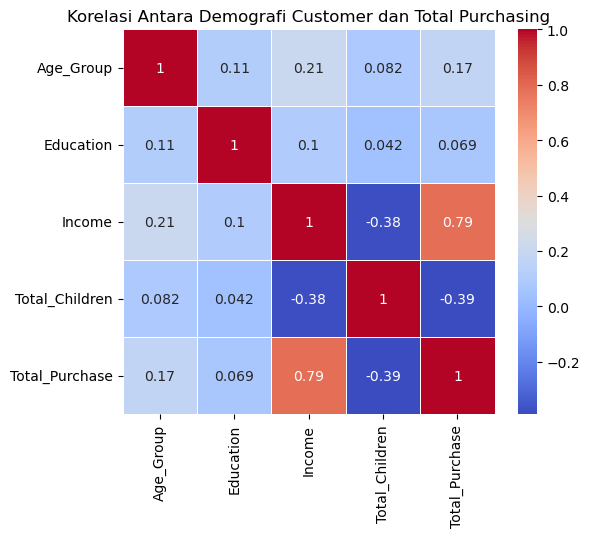

,Age_Group,Education,Income,Total_Children,Total_Purchase
Age_Group,1.000000,0.111429,0.210196,0.082495,0.172573
Education,0.111429,1.000000,0.103094,0.041550,0.069055
Income,0.210196,0.103094,1.000000,-0.380910,0.785406
Total_Children,0.082495,0.041550,-0.380910,1.000000,-0.390172
Total_Purchase,0.172573,0.069055,0.785406,-0.390172,1.000000


In [3532]:
df_corr = df[['Age_Group','Education','Income','Total_Children']]
df_corr['Total_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_corr['Age_Group'] = df_corr['Age_Group'].replace({'Adult' : 0, 'Middle Age' : 1, 'Older Adult' : 2})
df_corr['Education'] = df_corr['Education'].replace({'High School' : 0, 'Bachelor' : 1, 'Master' : 2,'PhD':3})

correlation_matirx = df_corr.corr('spearman')

plt.figure(figsize=(6,5))
sns.heatmap(correlation_matirx, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antara Demografi Customer dan Total Purchasing')
plt.show()

correlation_matirx

- Berdsarkan grafik diatas, variabel Income merupakan variabel yang memiliki korelasi paling kuat terhadap Total Pembelian dengan 0.79. nilai tersebut merupakan korelasi kuat positif yang artinya semakin tinggi income maka semakin tinggi pula purchase customer tersebut. kemudian untuk variabel total children mendapatkan nilai -0.39. nilai tersebut merupakan korelasi sedang negatif yang artinya semakin sedikit total children maka semakin banyak pembelian customer tersebut, dan begitupun sebaliknya.

## Kesimpulan 
#### Demografi Customer :

- kelompok umur yang customer didominasi oleh Middle Age (46-64 tahun) sebanyak 995 orang, kemudian Older Adult sebanyak 512 orang(diatas 64 tahun), dan yang paling sedikit Adult (25-45)sebanyak 497 orang.
- tingkat pendidikan customer yang paling banyak merupakan bachelor sebanyak 1011 orang kemudian tingkat pendidikan master sebanyak 512.orang. tingkat pendidikan PhD sebanyak 432 orang.  dan yang paling sedikit yaitu High Scholl sebanyak 49 oran..
- status perkawinan customer paling banyak yaitu married sebanyak 1283 orang, kemudian single sebanyak 441 orang, dan yang paling sedikit widow sebnayak 69 orang.
- untuk pendapatan customer berkisar antara 0 - 120000 tetapi yang terbanyak itu berada di rentang 40000-70000 pertahun.
- customer yang memiliki 1 anak merupakan yang paling banyak yaitu sebanyak 1020 orang kemudian yang tidak memiliki anak sebanyak 564, yang memiliki 2 anak sebanyak 375 dan yang paling sedikit memiliki 3 anak yaitu sebanyak 45 orang
- customer dengan kelompok income Low Income merupakan yang paling banyak dengan jumlah 1345 orang. Sedangkan untuk Middle Income sebanyak 659 orang.

#### Rata-rata uang yang di keluarkan untuk sebuah produk berdasarkan demografi:
- Tingkat pendidikan ==> Untuk Produk Wine, rata-rata pengeluaran paling tinggi dilakukan oleh customer dengan tingkat pendidikan PhD. Untuk Produk Fruits, Meat, Fish, Candy, Gold,  rata-rata pengeluaran paling tinggi dilakukan oleh customer dengan tingkat pendidikan Bachelor
- kelompok umur ==> rata-rata pengeluaran paling tinggi untuk semua produk dilakukan oleh customer dengan kelompok umur Older Adult (usia 64 tahun keatas).
- status perkawinan ==> customer dengan status perkawinan Widow merupakan customer dengan pengeluaran rata-rata tertinggi untuk setiap produk.
- Jumlah anak ==> Customer yang tidak memiliki anak merupakan customer dengan pengeluaran rata-rata tertinggi untuk setiap produk
- Income Group ==> customer dengan Middle income merupakan customer dengan pengeluaran rata-rata tertinggi pada setiap produk, bahkan perbandingannya cukup signifikan 

#### proporsi pembelian customer berdasarkan demografi
- pola proporsi pembelian produk berdasarkan demografi untuk semua produk hampir memiliki pola yang sama. dimana proporsi yang paling banyak itu adalah wine kemudian meat. dan proporsi yang paling sedikit adalah jeruk. Alasan mengapa wine merupakan proporsi pembelian terbesar adalah karena minum Wine dalam di banyak negara, termasuk US sudah menjadi sebuah tradisi. Tradisi minum wine sering dikaitkan dengan acara sosial, makan malam dan acara khusus lainnya. kombinasi dari faktor budaya, tren gaya hidup, pemasaran, dan daya beli yang tinggi membuat banyak orang di US rela mengeluarkan lebih banyak uang untuk wine. Hal ini menyebabkan konsumsi wine menjadi lebih bernilai dibandingkan dengan kebutuhan dasar lainnya di banyak kalangan konsumen di US.

#### Analisis Demografi berdasarkan Tempat pembelian

tempat pembelian customer yang paling banyak yaitu terdapat pada Toko fisik sebesar 46.2%, kemudian Web sebesar 32.8%, dan yang paling sedikit yaitu pembelian menggunakan Katalog sebesar 21.0%

rata-rata pembelian pada tempat berdasarkan demografi:
- Tingkat Pendidikan ==> Customer dengan tingkat pendidikan PhD merupakan yang tertinggi rata-rata pembeliannya pada setiap tempat. sedangkan customer dengan tingkat pendidikan High School merupakan yang paling rendah rata-rata pembeliannya.
- Kelompok Umur ==> untuk setiap tempat pembelian, pola grafik terlihat konsisten dengan rata-rata tertinggi pembeliannya merupakan customer dengan tipe kelompok umur Older Adul(64 tahun keatas) kemudian middle age (46-64 tahun) dan yang paling rendah yaitu Adult(25-45)
- Status perkawinan ==> status pernikahan widow merupakan yang memiliki rata-rata pembelian tertinggi berdasarkan status pernikahan pada semua tempat.
- Jumlah anak ==> berdasarkan grafik diatas, customer yang tidak memiliki anak merupakan yang tertinggi rata-rata pembeliannya di semua tempat. juga bisa dilihat bahwa jumlah anak mempengaruhi rata-rata pembelian customer. semakin banyak anak maka jumlah pembeliannya semakin berkurang dan begitupun sebali
- Kelompok Pendapatan ==> customer dengan kelompok pendapatan middle income merupakan yang tertinggi rata-rata pembeliannya di setiap tempat dan memiliki perbandingan yang cukup signifikan dengan low incomeknya

#### korelasi antara demografi dan total pembelian
- variabel Income merupakan variabel yang memiliki korelasi paling kuat terhadap Total Pembelian dengan nilai 0.79. nilai tersebut merupakan korelasi kuat positif yang artinya semakin tinggi income maka semakin tinggi pula purchase customer tersebut. kemudian untuk variabel total children mendapatkan nilai -0.39. nilai tersebut merupakan korelasi sedang negatif yang artinya semakin sedikit total children maka semakin banyak pembelian customer tersebut, dan begitupun sebaliknya. untuk variabel Age Group dan Education memiliki korelasi yang sangat lemah terhadap total pembelian.

# Rekomendasi 


1. lakukan optimalisasi pemasaran terhadap produk yang kurang laku seperti pada produk buah-buahan. optimalisasi bisa dilakukan dengan melakukan Paket Bundling Produk. Paket bundling dapat berupa gabungkan produk yang paling laris dengan produk yang kurang laku dalam bentuk bundling (paket), sehingga pelanggan mendapatkan penawaran yang lebih menarik.
   
2. jumlah customer yang memiliki anak sebanyak 1440 orang atau sekitar 75% dari total customer. Berdasarkan analysis, semakin banyak anak yang dimiliki customer maka semakin sedikit pembelian yang dilakukan. Permasalahan tersebut bisa di atasi dengan meluncurkan Produk atau Paket Edukatif untuk Keluarga dan Anak. karena dengan menambahkan produk atau layanan yang lebih relevan untuk keluarga, terutama bagi pelanggan yang memiliki anak dapat meningkatkan pembelian pada customer khususnya yang memiliki anak.

3. Luncurkan Varian Baru atau melakukan variasi pada ukuran kemasan pada produk yang paling laku. Strategi tersebut bisa dilakukan pada produk Wine karena produk tersebut merupakan yang paling tinggi proporsinya pembeliannya berdasarkan demografi customer. Bisa juga dilakukan pada produk meat karena proporsi pembeliannya tertinggi kedua.

4. Membuat kartu member untuk menargetkan customer dengan kategori low income. karena jumlah Customer dengan kategori low income merupakan yang paling banyak yaitu 1345 orang atau sekitar 66% dari total customer. dan berdasarkan analysis kategori tersebut memiliki rata-rata pembelian yang rendah bahkan sangat jauh dibandingkan dengan kategori middle income. Strategi tersebut dapat berupa pemberian diskon atau cashback eksklusif untuk member. Misalnya pembelian sekian akan mendapatkan diskon sebesar sekian

5. Mengoptimalkan pengalaman belanja untuk pelanggan berusia middle age(46-64 tahun) dan Older Adult(diatas 64 tahun) di toko fisik dan website. pengoptimalan tersebut dimaksudkan untuk membuat pengalaman belanja di toko fisik maupun website menjadi lebih mudah dan sederhana karena mayoritas customer berusia 45 tahun keatas. contoh optimalisasi pada toko fisik menyediakan berbagai metode pembayaran, termasuk pembayaran tunai dan non-tunai, serta fitur pembayaran cepat untuk memudahkan transaksi. dan contoh optimalisasi pada website seperti permudah proses checkout dengan mengurangi jumlah langkah yang diperlukan untuk menyelesaikan pembelian.